In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd

csv_file_path = '/Users/Pashlene/Desktop/Modified_player_allstar.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.fillna(0, inplace=True)
df.head()

,ilkid,year,firstname,lastname,conference,leag,gp,minutes,pts,dreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,AbdulKa01,1978,Karem,Abdul-Jabbar,west,N,1,28,11.0,0.0,...,0.0,0.0,0.0,0.0,12.0,5.0,2.0,1.0,0.0,0.0
1,AbdulKa01,1969,Karem,Abdul-Jabbar,east,N,1,18,10.0,0.0,...,0.0,0.0,0.0,0.0,8.0,4.0,2.0,2.0,0.0,0.0
2,AbdulKa01,1988,Kareem,Abdul-Jabbar,west,N,1,13,4.0,0.0,...,0.0,0.0,0.0,0.0,6.0,1.0,2.0,2.0,0.0,0.0
3,AbdulKa01,1987,Kareem,Abdul-Jabbar,west,N,1,14,10.0,0.0,...,0.0,0.0,0.0,0.0,9.0,4.0,2.0,2.0,0.0,0.0
4,AbdulKa01,1986,Kareem,Abdul-Jabbar,west,N,1,27,10.0,0.0,...,0.0,0.0,0.0,0.0,9.0,4.0,2.0,2.0,0.0,0.0


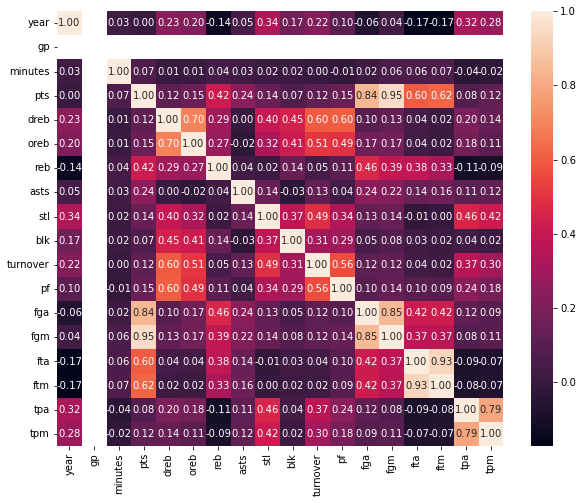

In [2]:
correlation_matrix =df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [3]:
performance_metrics = ['fga','fgm','pts']

# We will handle missing values by filling them with the median of the column
df_filled = df[performance_metrics].fillna(0)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model
iso_forest.fit(df_filled)

# Predict anomalies (the lower, the more anomalous)
scores = iso_forest.decision_function(df_filled)

# Add the scores to the original DataFrame to identify the players
df['anomaly_score'] = scores

In [4]:
# Sort the DataFrame based on the anomaly score to identify potential outstanding players
# The most outstanding players according to the model will have the lowest score
outstanding_players = df.sort_values('anomaly_score')

outstanding_players[['ilkid', 'year', 'firstname', 'lastname', 'anomaly_score']]

,ilkid,year,firstname,lastname,anomaly_score
76,BarryRi01,1966,Rick,Barry,-0.211957
720,JordaMi01,1987,Michael,Jordan,-0.198156
215,ChambWi01,1961,Wilt,Chamberlain,-0.198156
451,GarneKe01,2002,Kevin,Garnett,-0.194619
466,GerviGe01,1979,George,Gervin,-0.180580
...,...,...,...,...,...
881,McGinGe01,1975,George,McGinnis,0.148573
4,AbdulKa01,1986,Kareem,Abdul-Jabbar,0.148573
3,AbdulKa01,1987,Kareem,Abdul-Jabbar,0.148573
267,CummiTe01,1988,Terry,Cummings,0.148573
